In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans
from itertools import combinations

In [2]:
data = pd.read_csv('data.csv')
data.shape

(6344, 10)

In [3]:
data['Money'] = (data['Money'].str.replace(',','.')).astype(float)
data.head()

,id,Birth_y,Sex,LifeTime,LastLog_days_ago,LastPayment_days_ago,Sessions,Payments,Money,Level
0,1,1962,female,864,19,842,21,1,1.00,34
1,2,1972,female,499,2,4,489,25,27.77,44
2,3,1970,male,334,18,334,5,1,4.99,4
3,4,1962,male,149,19,145,512,2,2.98,68
4,5,1956,male,150,2,103,327,4,61.97,83


# Задание 1

#### 1.1. Рассчитайте долю пользователей, которые совершили последний логин более 1-х недель назад.

In [4]:
float(len(data[data['LastLog_days_ago']>=7]))/len(data)

0.40510718789407313

#### 1.2. Какое среднее количество сессий у пользователей, которые установили игру более года назад?

In [5]:
# 1 Вариант 
data[data['LifeTime']>=365]['Sessions'].mean()

427.8029908972692

In [6]:
# 2 Вариант 
data[data['LifeTime']>=365].describe()

,id,Birth_y,LifeTime,LastLog_days_ago,LastPayment_days_ago,Sessions,Payments,Money,Level
count,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000
mean,3248.770481,1959.020806,530.196359,8.546814,220.107932,427.802991,9.949285,129.892991,61.248375
std,1860.676578,13.070186,162.596120,8.067991,187.256246,587.292472,21.846451,490.171323,108.053341
min,1.000000,1905.000000,365.000000,1.000000,1.000000,3.000000,1.000000,0.990000,1.000000
25%,1593.500000,1951.000000,397.000000,2.000000,47.000000,68.000000,1.000000,2.990000,17.000000
50%,3338.500000,1959.000000,473.500000,5.000000,187.500000,239.000000,4.000000,13.995000,32.000000
75%,4842.750000,1967.000000,629.000000,13.750000,365.750000,548.750000,9.000000,59.640000,57.000000
max,6344.000000,1997.000000,922.000000,30.000000,903.000000,7553.000000,433.000000,9110.530000,999.000000


#### 1.3. Сделайте анализ игровой аудитории в зависимости от их пола и возраста.

In [7]:
# Функция для проставления возрастной группы
def age_gr(val):
    if val<30: return '0-30'
    elif val >=30 and val <40: return '30+'
    elif val >=40 and val <50: return '40+'
    elif val >=50 and val <60: return '50+'
    elif val >=60 and val <70: return '60+'
    elif val >=70 and val <80: return '70+'   
    else: return '80+'
    
#столбец с полным кол-вом лет
data['age'] = (2019-data['Birth_y'] // 1).astype(int)
# проставим возрастные группы
data['age_gr'] = map(age_gr,data['age'])

In [8]:
# Доля пользователей в каждой возрастной группе
data['age_gr'].value_counts(normalize=True).sort_index()

# Таким образом, ~56% пользователей игры в возрасте 50-70 лет

0-30    0.017182
30+     0.049811
40+     0.177648
50+     0.277112
60+     0.284521
70+     0.157472
80+     0.036255
Name: age_gr, dtype: float64

In [9]:
female = data[data['Sex'].str.strip() == 'female']
male = data[data['Sex'].str.strip() == 'male']
print 'Кол-во женщин -',female.shape[0]
print 'Кол-во мужчин -',male.shape[0]

Кол-во женщин - 2477
Кол-во мужчин - 3812


In [10]:
female.describe()

,id,Birth_y,LifeTime,LastLog_days_ago,LastPayment_days_ago,Sessions,Payments,Money,Level,age
count,2477.000000,2477.000000,2477.000000,2477.000000,2477.000000,2477.000000,2477.000000,2477.000000,2477.000000,2477.000000
mean,3128.054905,1958.262010,253.539766,8.039564,118.545418,273.578926,10.072669,111.025640,71.584578,60.737990
std,1816.048267,13.168397,168.957900,7.980391,116.798461,375.778725,18.117826,477.349827,121.275800,13.168397
min,1.000000,1905.000000,5.000000,1.000000,1.000000,2.000000,1.000000,0.990000,1.000000,19.000000
25%,1562.000000,1950.000000,123.000000,2.000000,28.000000,53.000000,2.000000,4.990000,20.000000,53.000000
50%,3095.000000,1958.000000,240.000000,4.000000,82.000000,150.000000,4.000000,16.970000,38.000000,61.000000
75%,4689.000000,1966.000000,302.000000,12.000000,185.000000,342.000000,10.000000,67.870000,71.000000,69.000000
max,6343.000000,2000.000000,908.000000,30.000000,846.000000,4384.000000,251.000000,16512.330000,999.000000,114.000000


In [11]:
male.describe()

,id,Birth_y,LifeTime,LastLog_days_ago,LastPayment_days_ago,Sessions,Payments,Money,Level,age
count,3812.000000,3812.000000,3812.000000,3812.000000,3812.000000,3812.000000,3812.000000,3812.000000,3812.000000,3812.000000
mean,3202.633001,1961.379066,294.754722,8.365950,139.478227,274.638510,8.940714,117.073570,69.723767,57.620934
std,1839.973262,13.030727,189.030024,8.112281,138.952511,430.658788,19.718397,573.198279,118.714452,13.030727
min,3.000000,1905.000000,5.000000,1.000000,1.000000,1.000000,1.000000,0.990000,1.000000,19.000000
25%,1609.250000,1953.000000,152.000000,2.000000,29.000000,44.000000,1.000000,2.990000,18.750000,49.000000
50%,3231.500000,1961.000000,264.000000,5.000000,90.000000,134.000000,4.000000,12.980000,36.000000,58.000000
75%,4801.500000,1970.000000,385.000000,13.000000,219.000000,339.000000,9.000000,55.942500,67.000000,66.000000
max,6344.000000,2000.000000,922.000000,30.000000,903.000000,8069.000000,435.000000,24194.420000,999.000000,114.000000


-=Женщины=-
Минимальный возраст - 19 , Максимальный возраст -  114
Средний возраст женской аудитории - 60.74
Мода - 49
Медиана - 61.0
Отклонение - 13.1683972549

-=Мужчины=-
Минимальный возраст - 19 , Максимальный возраст -  114
Средний возраст мужской аудитории - 57.62
Мода - 49
Медиана - 58.0
Отклонение - 13.0307273605


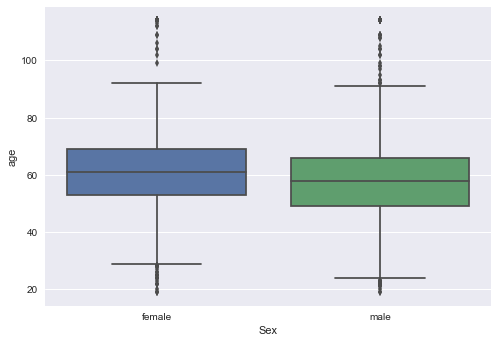

In [12]:
# средний возраст мужчин и женщин 

print '-=Женщины=-'
print 'Минимальный возраст -',female['age'].min(),', Максимальный возраст - ', female['age'].max()
print 'Средний возраст женской аудитории -', round(female['age'].mean(),2)
print 'Мода -', st.mode(female['age'])[0][0]
print 'Медиана -', np.percentile(female['age'],50)  
print 'Отклонение -', female['age'].std()
print
print '-=Мужчины=-'
print 'Минимальный возраст -',male['age'].min(),', Максимальный возраст - ', male['age'].max()
print 'Средний возраст мужской аудитории -', round(male['age'].mean(),2)
print 'Мода -', st.mode(male['age'])[0][0]
print 'Медиана -', np.percentile(male['age'],50)  
print 'Отклонение -', male['age'].std()


sns.boxplot(x="Sex", y="age",data=data)
plt.show()

In [13]:
# Сводная таблица по среднему кол-ву платежей для М и Ж разных возрастных групп
pd.pivot_table(data, values=['Payments'], index='Sex', columns='age_gr', aggfunc='mean')

# По результатам этой таблицы можем сказать, что чаще совершают платежи женщины старше 70-ти лет 
# и мужчины 70-80 лет

Payments                                                              
age_gr      0-30       30+       40+       50+       60+        70+        80+
Sex                                                                           
female  4.228571  6.346939  9.903846  9.537975  9.689610  12.230108  12.380531
male    2.931507  7.059633  8.383178  8.617806  9.735236  10.681214   8.094017

In [14]:
# Сводная таблица по средней сумме платежей для М и Ж разных возрастных групп
pd.pivot_table(data, values=['Money'], index='Sex', columns='age_gr', aggfunc='mean')

# В данной таблице видим, что женщины 40-50 и 70+ склонны тратить больше денег на игру
# в то время как "молодые" (0-30 лет) тратят малые суммы
# Мужчины 0-30 лет так же тратят на игру меньше всех остальных групп; 
# максимальные суммы трат наблюдаем в группах 60-80 лет

Money                                                            \
age_gr       0-30        30+         40+        50+         60+         70+   
Sex                                                                           
female  28.248286  37.526020  157.564258  90.002674   84.433390  158.034602   
male    34.535890  47.027431   94.692710  97.410567  165.231614  142.819715   

                    
age_gr         80+  
Sex                 
female  155.835310  
male     95.082479

In [15]:
# средний уровень в игре для М и Ж
pd.pivot_table(data, values=['Level'], index='Sex', columns='age_gr', aggfunc='mean')

# Как видим, среднее значение уровня в игре для женщин с возрастом уменьшается
# при чем самый высокий уровень в группе 0-30, где так же совершаются незначительные платежи. 
# Можно предположить, что молодые женщины более азартны и продвигаются в игре своими силами с 
# незначительным донатом. 

# Для мужчин мы видим, что наивысшие уровни в группах 40-70 лет
# В этих группах среднее кол-во и сумма платежей являются достаточно высокими
# (для 60-70 лет мы имеем максимальную среднюю сумму трат - 165 рублей)
# Можно предположить, что мужчины продвигаются в игре в основном с помощью доната. 

Level                                                         \
age_gr        0-30        30+        40+        50+        60+        70+   
Sex                                                                         
female  111.828571  80.612245  82.019231  81.061709  64.275325  61.421505   
male     62.109589  53.944954  74.212283  70.739209  73.458661  61.914611   

                   
age_gr        80+  
Sex                
female  56.300885  
male    68.230769

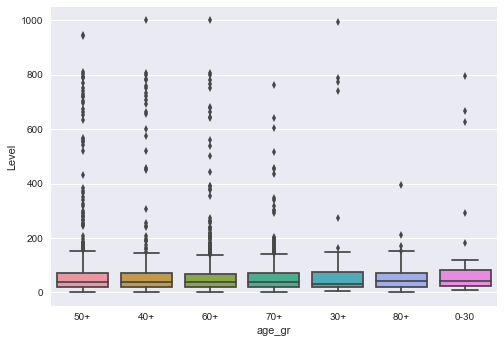

In [16]:
# средний уровень в игре для женщин разных возрастов
sns.boxplot(x="age_gr", y="Level",data=female)
plt.show()

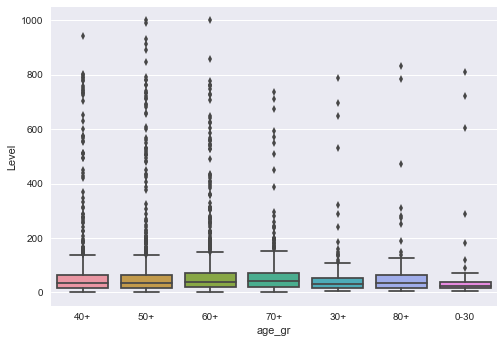

In [17]:
# средний уровень в игре для женщин разных возрастов
sns.boxplot(x="age_gr", y="Level",data=male)
plt.show()

#### 1.4. Являются ли данные о возрасте игроков симметричными относительно среднего значения? 

In [19]:
# Для определения симметричности посчитаем ассиметрию. Для абсолютно симметричного распределения значение =0.
st.skew(data['age']-data['age'].mean())

0.32637331069526865

In [24]:
# Можно воспользоваться тестом на ассиметричность 
# Н0: асимметрия популяции, из которой была взята выборка, такая же, как у соответствующего нормального распределения
st.skewtest(data['age']-data['age'].mean(), axis=0) 

# pvalue < 0.05 - нет оснований принять гипотезу Н0

SkewtestResult(statistic=10.361609051432042, pvalue=3.706732266171579e-25)

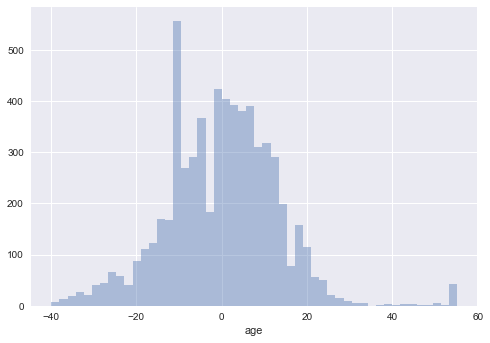

In [25]:
sns.distplot(data['age']-data['age'].mean(), kde = False)
plt.show()

#### 1.5. Какие значения возраста игроков, по Вашему мнению, являются аномальными? Предложите правило отбора таких игроков.

In [26]:
# Считаю, что в первую очередь аномальными являются значения, которые протеворечат здравому смыслу
# (как возраст игрока 114 лет). 
# Так же аномальными значениями будут те, которые не характерны для выборки, являются слишком малыми/большими и находятся в
# длинных хвостах распределений. 

In [27]:
print 'min-', data['age'].min()
print 'max-', data['age'].max()
print 'mediana -',np.percentile(data['age'],50)  
print 'mean - ',data['age'].mean()

min- 19
max- 114
mediana - 59.0
mean -  58.8444199243


1 percentile - 26.0
99 percentile - 98.0


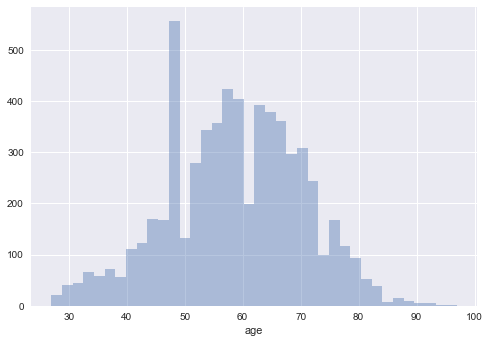

In [28]:
# Один из способов, который я использовала, это считать аномальными значения меньше за 1 персентиль 
# и больше за 99 персентиль. 
# Таким образом мы убираем 2% значений от всей выборки, но заметно уменьшаем длинный хвост справа и слева
min_ = np.percentile(data['age'],1)
max_ = np.percentile(data['age'],99)
print '1 percentile -', min_
print '99 percentile -', max_

sns.distplot(data[(data['age']>min_)&(data['age']<max_)]['age'], kde=False)
plt.show()

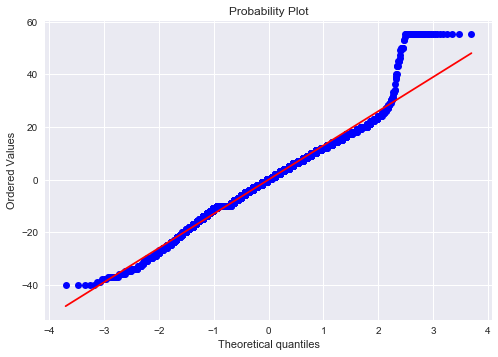

In [29]:
# Если мы сможем с помощью критериев проверки на нормальность убедится, что наше распредление взято из нормального, 
# то можно воспользоваться правилом 3 сигм для чистки выбросов

# Можем построить Q-Q график
st.probplot(data['age'], dist='norm', plot=plt)
plt.show()
# Как видим, точки не полностью лежат на красной линии, это свидетельствует об отклонении от нормального распределения 

In [31]:
# Тест Шапиро-Уилко 
# H0: данные взяты из нормального распределения
# H1: данные взяты не из нормального распределения

print 'Тест Шапиро-Уилко: p-val =',st.shapiro(data['age'])[1], ' < 0.05'
# Нет оснований принять гипотезу H0

Тест Шапиро-Уилко: p-val = 5.94186357141e-32  < 0.05


# Задание 2

На основании данных из задания №1 необходимо произвести сегментацию базы пользователей-плательщиков игры Покер.
Цель: получить группы пользователей, схожих между собой по некоторым характеристикам, чтобы в дальнейшем разрабатывать для каждой из групп специальные предложения (акции, подарки и прочее). 

#### 2.1. Какие параметры вы выберете для сегментации? Аргументируйте.

LifeTime | LastLog_days_ago


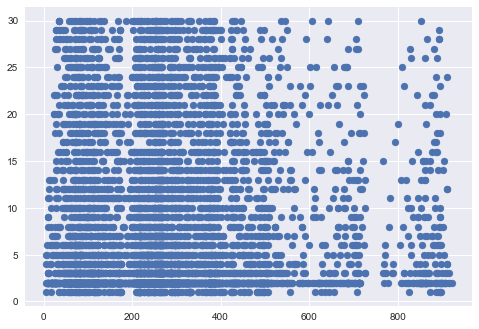

LifeTime | LastPayment_days_ago


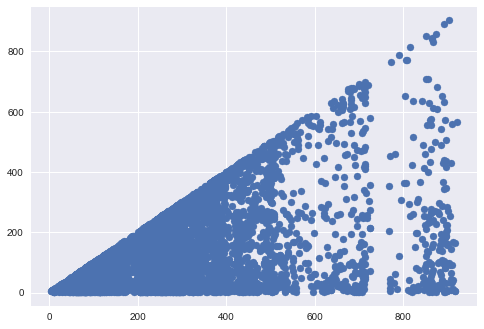

LifeTime | Sessions


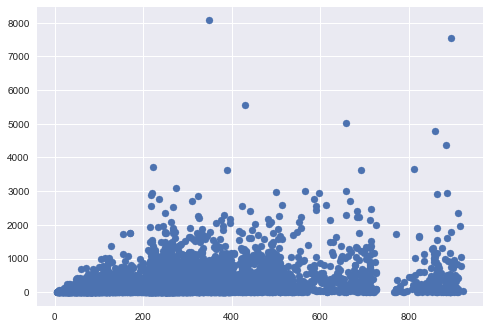

LifeTime | Payments


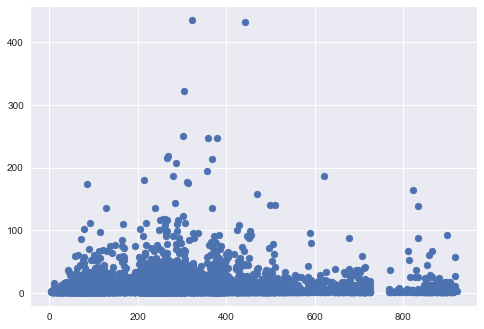

LifeTime | Money


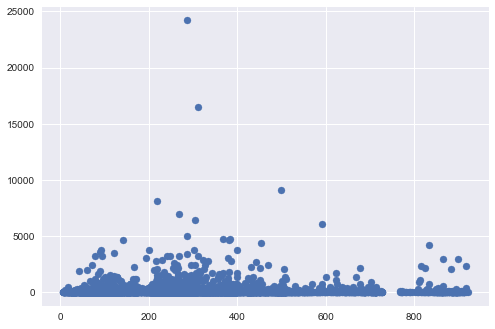

LifeTime | Level


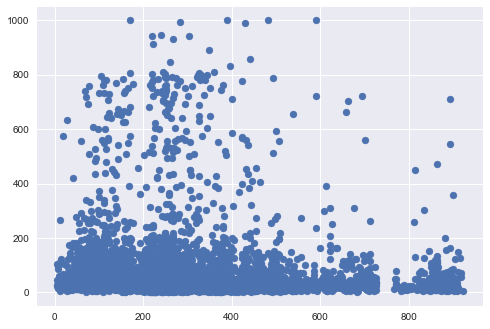

LifeTime | age


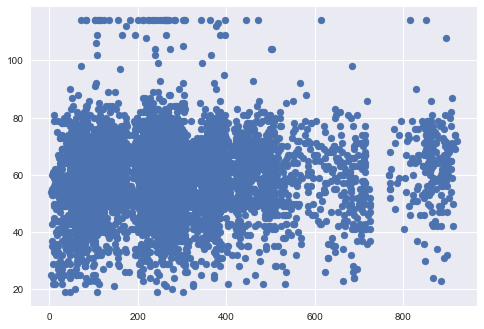

LastLog_days_ago | LastPayment_days_ago


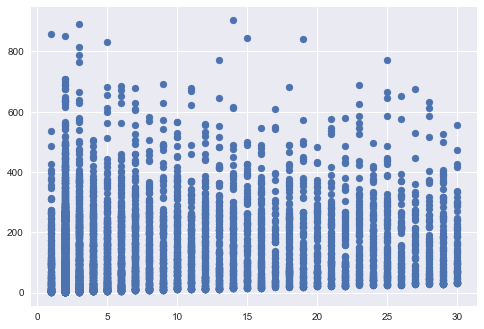

LastLog_days_ago | Sessions


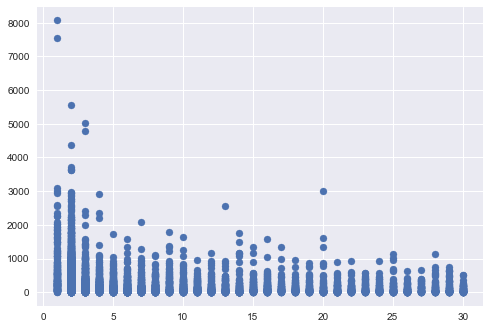

LastLog_days_ago | Payments


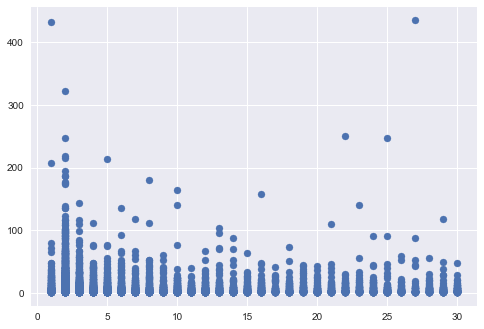

LastLog_days_ago | Money


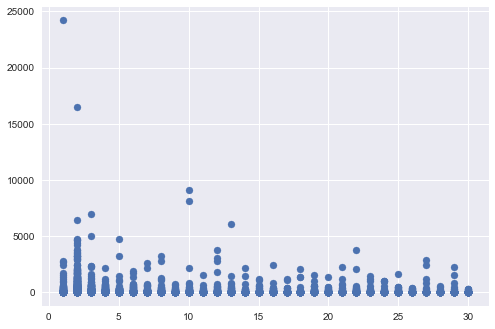

LastLog_days_ago | Level


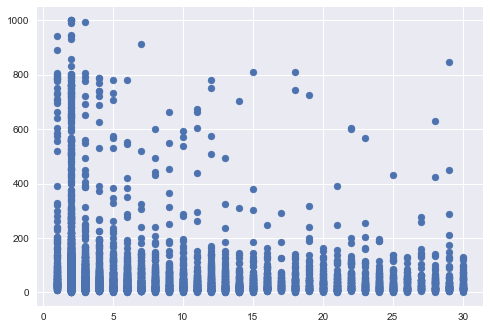

LastLog_days_ago | age


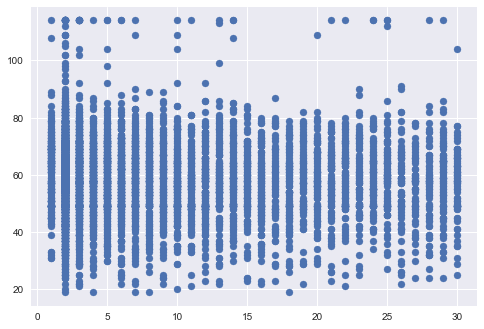

LastPayment_days_ago | Sessions


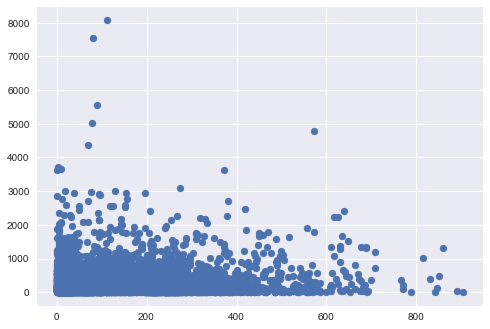

LastPayment_days_ago | Payments


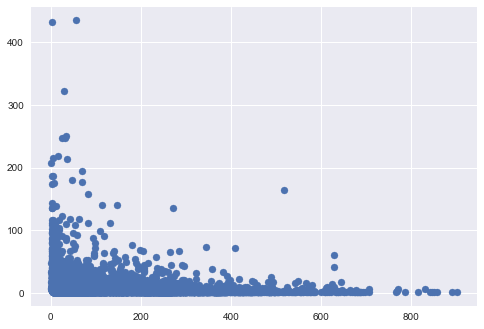

LastPayment_days_ago | Money


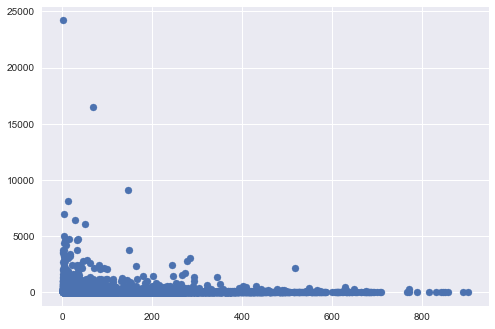

LastPayment_days_ago | Level


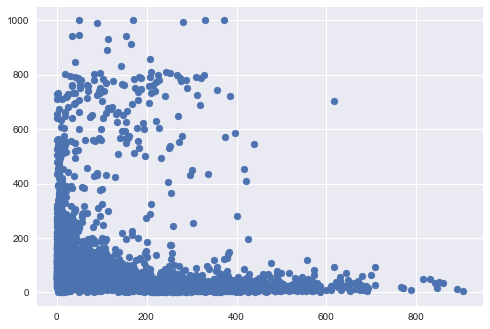

LastPayment_days_ago | age


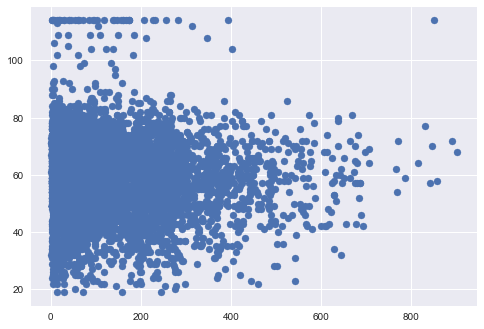

Sessions | Payments


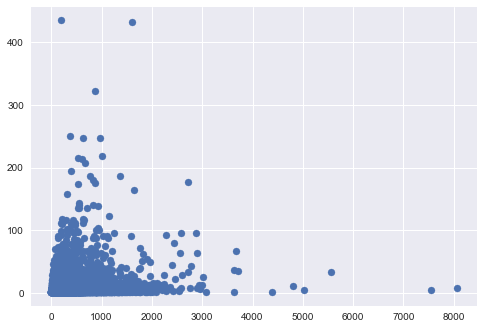

Sessions | Money


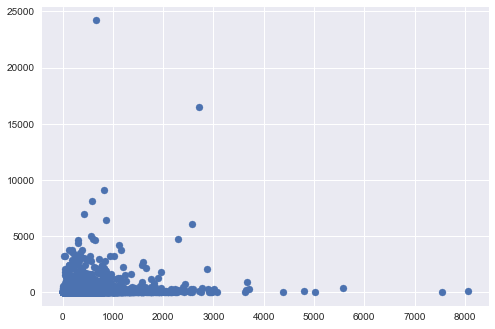

Sessions | Level


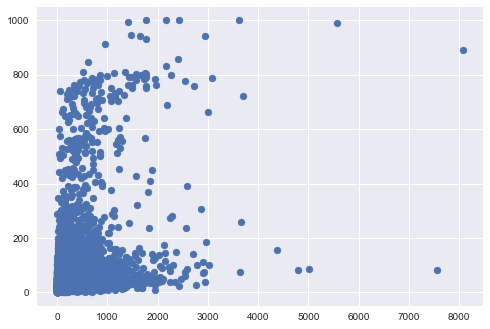

Sessions | age


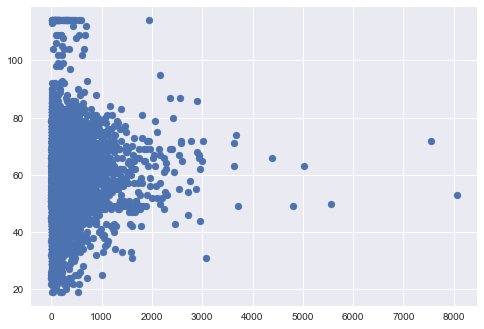

Payments | Money


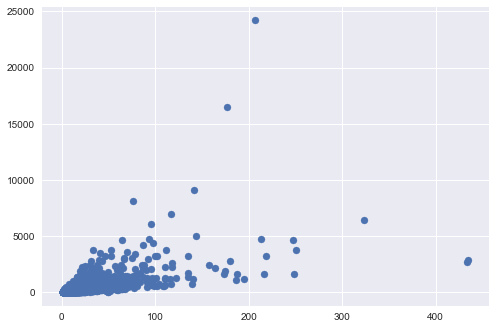

Payments | Level


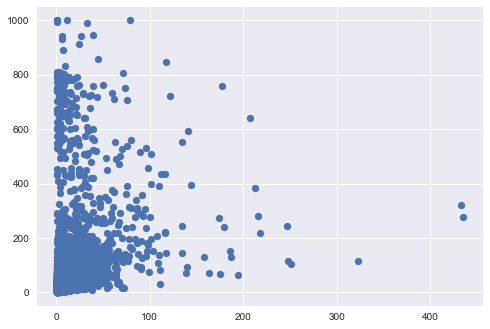

Payments | age


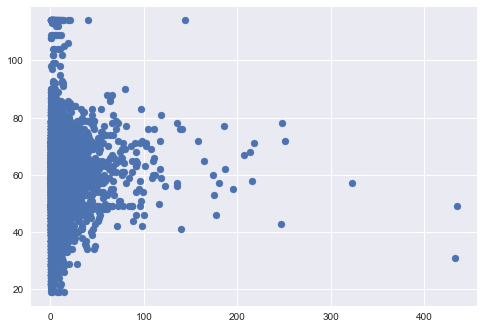

Money | Level


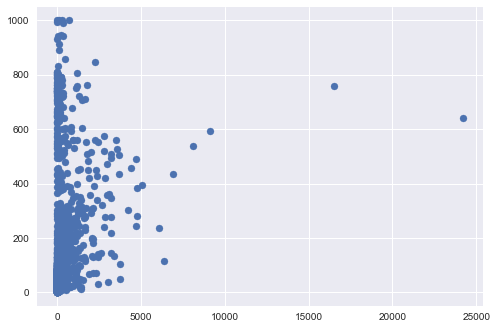

Money | age


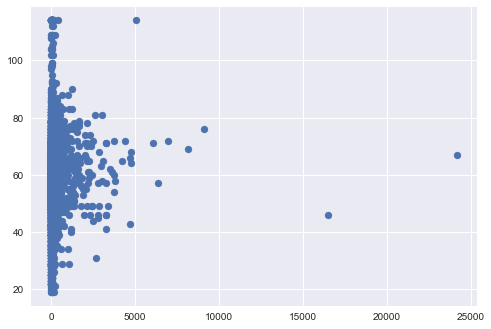

Level | age


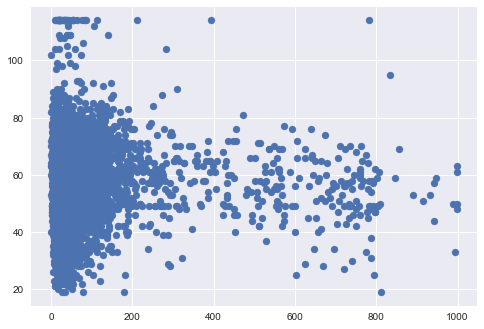

In [32]:
# Для кластеризации я отобрала следующие предикторы: 
# LifeTime,LastLog_days_ago,LastPayment_days_ago, Sessions,Payments,Money, Level, age
# Не брала Sex так как понятно, что он не будет просто делить на М и Ж; 
# Ну и вполне логично, что мы хотим разделить пользователей на группы исходя из игровых данных

# Ниже я вывела все пары предикторов, чтобы визуально оценить образуют ли какие-то из них явные кластеры
comb = combinations([ u'LifeTime', u'LastLog_days_ago',u'LastPayment_days_ago', u'Sessions', u'Payments',\
              u'Money', u'Level',u'age'], 2)

for i,j in comb:
    #print '-------------------------------------------------------'
    print i,'|',j 
    x_val = data[str(i)]
    y_val = data[str(j)]
    plt.scatter(x_val, y_val)
    plt.show()    

#### 2.2. Проведите сегментацию. Определите оптимальное, по Вашему мнению, количество сегментов. 

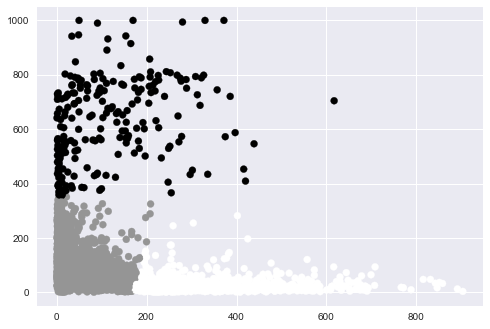

In [33]:
# Для кластеризации был выбран алгоритм К-средних
first_p = 'LastPayment_days_ago'
sec_p = 'Level'

model = KMeans(n_clusters = 3, random_state=0, n_jobs=-1)
model.fit(data[[first_p,sec_p]]) 
pred = model.predict(data[[first_p,sec_p]])
x_val = data[first_p]
y_val = data[sec_p]
plt.scatter(x_val, y_val, c = pred)
plt.show()

#### 2.3. Сделайте анализ полученных сегментов (наполняемость, описательные статистики и т.д.).

In [34]:
print 'Наполняемость кластеров:'
pd.Series(pred).value_counts(normalize=True).sort_index()

Наполняемость кластеров:


0    0.293821
1    0.671501
2    0.034678
dtype: float64

In [35]:
# Статистики для клиентов 0 кластера
data.loc[pred==0].describe()

,id,Birth_y,LifeTime,LastLog_days_ago,LastPayment_days_ago,Sessions,Payments,Money,Level,age
count,1864.000000,1864.000000,1864.000000,1864.000000,1864.000000,1864.000000,1864.000000,1864.000000,1864.000000,1864.000000
mean,3291.831009,1961.152897,377.293991,10.025215,294.533798,271.558476,4.625536,41.165944,22.765021,57.847103
std,1843.686412,12.984226,165.777248,8.487236,114.092517,370.340532,7.852185,150.471838,21.311672,12.984226
min,1.000000,1905.000000,182.000000,1.000000,172.000000,2.000000,1.000000,0.990000,1.000000,20.000000
25%,1684.250000,1953.000000,260.000000,2.000000,216.000000,40.750000,1.000000,1.980000,11.000000,49.000000
50%,3427.500000,1961.000000,320.000000,7.000000,257.000000,139.000000,2.000000,6.980000,17.000000,58.000000
75%,4877.250000,1970.000000,442.000000,16.000000,337.250000,358.000000,5.000000,25.212500,27.000000,66.000000
max,6343.000000,1999.000000,922.000000,30.000000,903.000000,4795.000000,164.000000,3040.330000,282.000000,114.000000


In [36]:
# Статистики для клиентов 1 кластера
data.loc[pred==1].describe()

,id,Birth_y,LifeTime,LastLog_days_ago,LastPayment_days_ago,Sessions,Payments,Money,Level,age
count,4260.000000,4260.000000,4260.000000,4260.000000,4260.00000,4260.000000,4260.000000,4260.000000,4260.000000,4260.000000
mean,3127.090610,1959.566197,234.548592,7.640610,60.04554,243.373239,10.591315,107.801465,62.773474,59.433803
std,1823.613907,13.218612,173.497758,7.810938,48.84039,357.150974,20.534325,327.507696,52.597428,13.218612
min,2.000000,1905.000000,5.000000,1.000000,1.00000,1.000000,1.000000,0.990000,1.000000,19.000000
25%,1553.500000,1951.000000,101.000000,2.000000,17.00000,47.000000,2.000000,4.990000,27.000000,51.000000
50%,3046.500000,1960.000000,218.000000,3.000000,47.00000,130.000000,5.000000,19.945000,47.000000,59.000000
75%,4703.250000,1968.000000,297.000000,11.000000,94.00000,307.000000,11.000000,75.922500,78.000000,68.000000
max,6344.000000,2000.000000,917.000000,30.000000,209.00000,7553.000000,435.000000,6384.770000,351.000000,114.000000


In [37]:
# Статистики для клиентов 2 кластера
data.loc[pred==2].describe()

,id,Birth_y,LifeTime,LastLog_days_ago,LastPayment_days_ago,Sessions,Payments,Money,Level,age
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,3040.731818,1963.118182,277.945455,4.386364,115.490909,898.300000,27.468182,889.444000,628.650000,55.881818
std,1840.047008,12.391802,155.797277,5.500585,112.762590,903.643877,36.357985,2330.734022,156.957343,12.391802
min,9.000000,1905.000000,18.000000,1.000000,1.000000,42.000000,1.000000,0.990000,355.000000,19.000000
25%,1530.750000,1956.000000,166.750000,2.000000,19.000000,336.750000,4.000000,22.930000,510.000000,49.000000
50%,2975.500000,1963.000000,254.000000,2.000000,87.500000,630.500000,14.500000,143.805000,637.500000,56.000000
75%,4605.000000,1970.000000,330.750000,4.000000,182.500000,1194.250000,34.000000,712.332500,750.250000,63.000000
max,6338.000000,2000.000000,899.000000,29.000000,617.000000,8069.000000,213.000000,24194.420000,999.000000,114.000000


In [ ]:
# Как мы можем заметить, кластеры разбились не идеально, есть пересечения 

#### 2.4. Какие дальнейшие стратегии работы с полученными сегментами пользователей Вы порекомендуете?

In [ ]:
# Итого: 
# В 0 кластере у нас клиенты, которые платили достаточно давно и при этом не достигли высокого уровня в игре. 
# Очевидно что, они потеряли интерес к игре или продвигаться без доната им сложно. Можно предложить скидки на покупку
# дополнительных фишек или бонусы за возвращение в игру.

# В 1 кластере клиенты, которые тоже на начальных уровнях, но платили последний раз до 200 дней назад, 
# это заинтересованные пользователи, которым можно предложить способы быстрого поднятия уровня через покупку до услуг.

# В 2 кластере находятся клиенты, которые достигли высоких уровней и при этом недавно платили в игре. Я думаю, что таким 
# клиентам можно давать дополнительные бесплатные бонусы, чтоб подогревать интерес к игре.

## Задание 3

In [38]:
tab = pd.read_csv('data1.csv')
tab.shape

(11, 18)

In [39]:
# Приводим таблицу к нормальному виду
tab['Period'] = pd.to_datetime(tab['Period'])
tab['Price_1'] = (tab['Price_1'].str.replace(',','.')).astype(float)
tab['Profit_acc_1'] = (tab['Profit_acc_1'].str.replace(',','.')).astype(float)
for i in range(1,13):
    tab[str(i)] = (tab[str(i)].str.replace('-','0')).str.replace(',','.').astype(float)

In [40]:
tab

,Period,One_costs,Profit_acc,Cnt_install,Price_1,Profit_acc_1,1,2,3,4,5,6,7,8,9,10,11,12
0,2015-01-01,20993,45974,28168,0.7,1.6,0.38,0.76,0.99,1.12,1.20,1.26,1.30,1.36,1.44,1.50,1.59,1.63
1,2015-02-01,47079,116475,26663,1.8,4.4,0.83,1.70,2.10,2.38,2.64,3.03,3.36,3.61,3.90,4.15,4.37,0.00
2,2015-03-01,144109,127178,42267,3.4,3.0,0.82,1.60,1.94,2.16,2.36,2.50,2.64,2.80,2.92,3.01,0.00,0.00
3,2015-04-01,125072,73330,31103,4.0,2.4,0.71,1.34,1.58,1.80,1.96,2.07,2.17,2.27,2.36,0.00,0.00,0.00
4,2015-05-01,81831,53457,41406,2.0,1.3,0.49,0.70,0.83,0.98,1.07,1.15,1.25,1.29,0.00,0.00,0.00,0.00
5,2015-06-01,17168,19870,6700,2.6,3.0,0.66,1.51,2.13,2.44,2.72,2.88,2.97,0.00,0.00,0.00,0.00,0.00
6,2015-07-01,28940,26922,6741,4.3,4.0,1.23,2.45,2.96,3.41,3.73,3.99,0.00,0.00,0.00,0.00,0.00,0.00
7,2015-08-01,48653,54343,12291,4.0,4.4,1.19,2.53,3.28,3.79,4.42,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,2015-09-01,55696,50020,12371,4.5,4.0,1.32,2.64,3.48,4.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,2015-10-01,38681,19153,12823,3.0,1.5,0.53,1.16,1.49,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


#### 3.1. Постройте прогноз Накопительного дохода на нового игрока для месяцев, по которым отсутвуют данные. 

r2_score -  0.99214280474597
Y_true
[0.38, 0.76, 0.99, 1.12, 1.2, 1.26, 1.3, 1.36, 1.44, 1.5, 1.59, 1.63]
Y_predict
[0.45, 0.73, 0.93, 1.08, 1.19, 1.28, 1.36, 1.42, 1.47, 1.51, 1.55, 1.58]


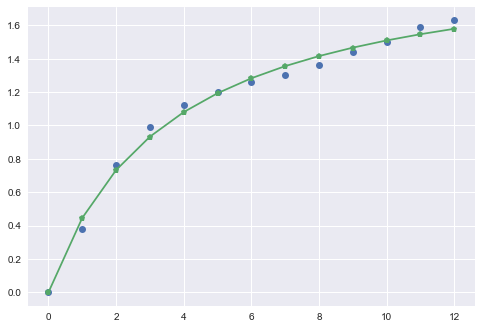

In [41]:
# На известных данных за 2015-01-01 подберем функцию, которая хорошо восстановит данные
# Для линейной функции r2 = 0.8448, для нелинейной - 0.9921 

def f(x,a,b):
    #return a*x+b  # r2 = 0.8448
    return x/(a*x+b) 

x=range(0,13)
y=[0]+list(tab[[str(i) for i in range(1,13)]].loc[0])

coef, _ = curve_fit(f, x, y)
pred = [f(i, coef[0], coef[1]) for i in x]

print 'r2_score - ', r2_score(y,pred)
print 'Y_true'
print y[1:]
print 'Y_predict'
print [round(i,2) for i in pred[1:]]

plt.plot(x, y , 'o')
plt.plot(x, pred , 'p-')
plt.show()

In [42]:
# SREZ = 1 (2015-02-01)
# COLUMN FOR PREDICT = 12

x=range(0,12)
y=[0]+list(tab[[str(i) for i in range(1,13)]].loc[1])[:-1] # известные значения
coef, _ = curve_fit(f, x, y)                               # подбор коэффициентов для функции
tab['12'].loc[1] = round(f(12, coef[0], coef[1]),2)        # записали предсказанное значение для 12 столбца в таблицу

C:\Users\DEXTER\Anaconda2\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


--------------------------------------------------------------------------
--------------------------------------------------------------------------
--==--
SREZ =  2
COLUMN =  11
coef: [0.25348846 0.82922057]
Y_true= [0, 0.82, 1.6, 1.94, 2.16, 2.36, 2.5, 2.64, 2.8, 2.92, 3.01]
Y_PREDICT= 3.0407
r2= 0.9963542969456592
--==--
SREZ =  2
COLUMN =  12
coef: [0.25348825 0.82922144]
Y_true= [0, 0.82, 1.6, 1.94, 2.16, 2.36, 2.5, 2.64, 2.8, 2.92, 3.01, 3.0407]
Y_PREDICT= 3.0999
r2= 0.9966803766245875


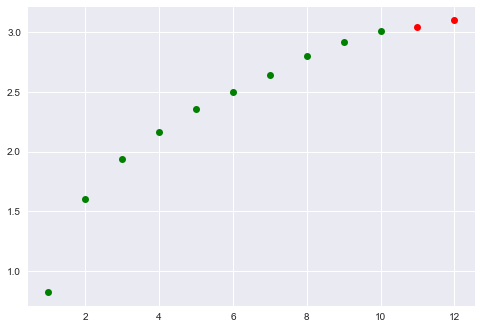

--------------------------------------------------------------------------
--------------------------------------------------------------------------
--==--
SREZ =  3
COLUMN =  10
coef: [0.32237369 0.93927506]
Y_true= [0, 0.71, 1.34, 1.58, 1.8, 1.96, 2.07, 2.17, 2.27, 2.36]
Y_PREDICT= 2.4021
r2= 0.9973013360996975
--==--
SREZ =  3
COLUMN =  11
coef: [0.32237424 0.9392731 ]
Y_true= [0, 0.71, 1.34, 1.58, 1.8, 1.96, 2.07, 2.17, 2.27, 2.36, 2.4021]
Y_PREDICT= 2.4524
r2= 0.9975604569005684
--==--
SREZ =  3
COLUMN =  12
coef: [0.32237468 0.93927138]
Y_true= [0, 0.71, 1.34, 1.58, 1.8, 1.96, 2.07, 2.17, 2.27, 2.36, 2.4021, 2.4524]
Y_PREDICT= 2.496
r2= 0.9977656399160839


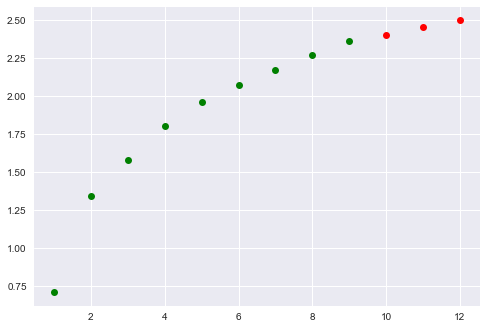

--------------------------------------------------------------------------
--------------------------------------------------------------------------
--==--
SREZ =  4
COLUMN =  9
coef: [0.57070332 1.73444698]
Y_true= [0, 0.49, 0.7, 0.83, 0.98, 1.07, 1.15, 1.25, 1.29]
Y_PREDICT= 1.3099
r2= 0.9950621875553483
--==--
SREZ =  4
COLUMN =  10
coef: [0.57070196 1.73445156]
Y_true= [0, 0.49, 0.7, 0.83, 0.98, 1.07, 1.15, 1.25, 1.29, 1.3099]
Y_PREDICT= 1.3438
r2= 0.9956320483808209
--==--
SREZ =  4
COLUMN =  11
coef: [0.57070746 1.73443072]
Y_true= [0, 0.49, 0.7, 0.83, 0.98, 1.07, 1.15, 1.25, 1.29, 1.3099, 1.3438]
Y_PREDICT= 1.3729
r2= 0.996068387023904
--==--
SREZ =  4
COLUMN =  12
coef: [0.57070841 1.73442685]
Y_true= [0, 0.49, 0.7, 0.83, 0.98, 1.07, 1.15, 1.25, 1.29, 1.3099, 1.3438, 1.3729]
Y_PREDICT= 1.3981
r2= 0.9964124152311667


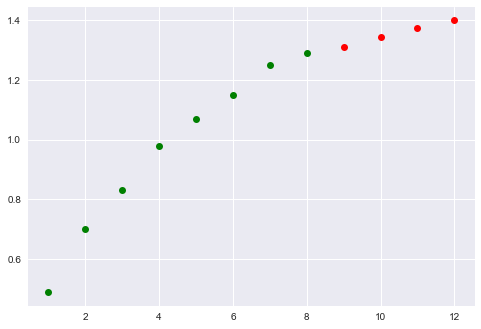

--------------------------------------------------------------------------
--------------------------------------------------------------------------
--==--
SREZ =  5
COLUMN =  8
coef: [0.19118793 0.92859514]
Y_true= [0, 0.66, 1.51, 2.13, 2.44, 2.72, 2.88, 2.97]
Y_PREDICT= 3.2545
r2= 0.9885118280781668
--==--
SREZ =  5
COLUMN =  9
coef: [0.19119107 0.92858468]
Y_true= [0, 0.66, 1.51, 2.13, 2.44, 2.72, 2.88, 2.97, 3.2545]
Y_PREDICT= 3.3971
r2= 0.990344148950959
--==--
SREZ =  5
COLUMN =  10
coef: [0.19119218 0.92858029]
Y_true= [0, 0.66, 1.51, 2.13, 2.44, 2.72, 2.88, 2.97, 3.2545, 3.3971]
Y_PREDICT= 3.5205
r2= 0.991675693533315
--==--
SREZ =  5
COLUMN =  11
coef: [0.19119223 0.92858038]
Y_true= [0, 0.66, 1.51, 2.13, 2.44, 2.72, 2.88, 2.97, 3.2545, 3.3971, 3.5205]
Y_PREDICT= 3.6283
r2= 0.9926800328998532
--==--
SREZ =  5
COLUMN =  12
coef: [0.19119349 0.92857483]
Y_true= [0, 0.66, 1.51, 2.13, 2.44, 2.72, 2.88, 2.97, 3.2545, 3.3971, 3.5205, 3.6283]
Y_PREDICT= 3.7234
r2= 0.9934605427125714

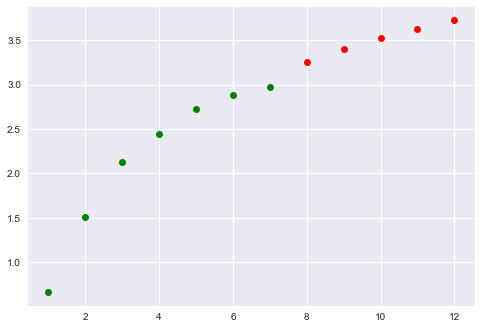

--------------------------------------------------------------------------
--------------------------------------------------------------------------
--==--
SREZ =  6
COLUMN =  7
coef: [0.15612004 0.55396504]
Y_true= [0, 1.23, 2.45, 2.96, 3.41, 3.73, 3.99]
Y_PREDICT= 4.2507
r2= 0.9957171160086629
--==--
SREZ =  6
COLUMN =  8
coef: [0.1561181  0.55397071]
Y_true= [0, 1.23, 2.45, 2.96, 3.41, 3.73, 3.99, 4.2507]
Y_PREDICT= 4.4373
r2= 0.9964401914674829
--==--
SREZ =  6
COLUMN =  9
coef: [0.15611669 0.55397523]
Y_true= [0, 1.23, 2.45, 2.96, 3.41, 3.73, 3.99, 4.2507, 4.4373]
Y_PREDICT= 4.5941
r2= 0.9969471485929218
--==--
SREZ =  6
COLUMN =  10
coef: [0.15611726 0.55397321]
Y_true= [0, 1.23, 2.45, 2.96, 3.41, 3.73, 3.99, 4.2507, 4.4373, 4.5941]
Y_PREDICT= 4.7278
r2= 0.9973197945065089
--==--
SREZ =  6
COLUMN =  11
coef: [0.1561174  0.55397267]
Y_true= [0, 1.23, 2.45, 2.96, 3.41, 3.73, 3.99, 4.2507, 4.4373, 4.5941, 4.7278]
Y_PREDICT= 4.8431
r2= 0.9976039925383419
--==--
SREZ =  6
COLUMN =  1

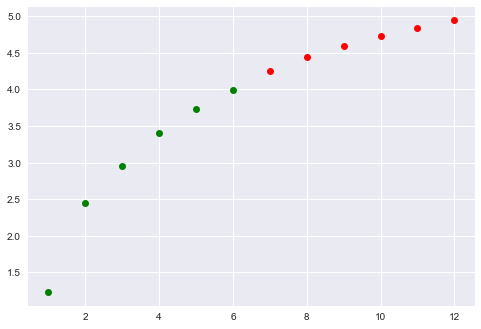

--------------------------------------------------------------------------
--------------------------------------------------------------------------
--==--
SREZ =  7
COLUMN =  6
coef: [0.09966021 0.63441363]
Y_true= [0, 1.19, 2.53, 3.28, 3.79, 4.42]
Y_PREDICT= 4.8686
r2= 0.9958342627244933
--==--
SREZ =  7
COLUMN =  7
coef: [0.0996625  0.63440704]
Y_true= [0, 1.19, 2.53, 3.28, 3.79, 4.42, 4.8686]
Y_PREDICT= 5.2551
r2= 0.9968804401451404
--==--
SREZ =  7
COLUMN =  8
coef: [0.0996618 0.6344093]
Y_true= [0, 1.19, 2.53, 3.28, 3.79, 4.42, 4.8686, 5.2551]
Y_PREDICT= 5.5877
r2= 0.9975401227005669
--==--
SREZ =  7
COLUMN =  9
coef: [0.0996631  0.63440448]
Y_true= [0, 1.19, 2.53, 3.28, 3.79, 4.42, 4.8686, 5.2551, 5.5877]
Y_PREDICT= 5.8771
r2= 0.9979854154161171
--==--
SREZ =  7
COLUMN =  10
coef: [0.09966271 0.63440608]
Y_true= [0, 1.19, 2.53, 3.28, 3.79, 4.42, 4.8686, 5.2551, 5.5877, 5.8771]
Y_PREDICT= 6.1311
r2= 0.9983019164291793
--==--
SREZ =  7
COLUMN =  11
coef: [0.09966241 0.63440742]
Y

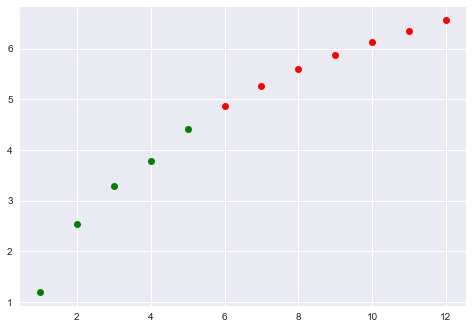

--------------------------------------------------------------------------
--------------------------------------------------------------------------
--==--
SREZ =  8
COLUMN =  5
coef: [0.09536548 0.59309676]
Y_true= [0, 1.32, 2.64, 3.48, 4.04]
Y_PREDICT= 4.6732
r2= 0.9968364435478114
--==--
SREZ =  8
COLUMN =  6
coef: [0.09536717 0.59309262]
Y_true= [0, 1.32, 2.64, 3.48, 4.04, 4.6732]
Y_PREDICT= 5.1489
r2= 0.9977979006311605
--==--
SREZ =  8
COLUMN =  7
coef: [0.0953675  0.59309169]
Y_true= [0, 1.32, 2.64, 3.48, 4.04, 4.6732, 5.1489]
Y_PREDICT= 5.5526
r2= 0.9983490749209717
--==--
SREZ =  8
COLUMN =  8
coef: [0.0953684 0.5930887]
Y_true= [0, 1.32, 2.64, 3.48, 4.04, 4.6732, 5.1489, 5.5526]
Y_PREDICT= 5.8995
r2= 0.9986965676513256
--==--
SREZ =  8
COLUMN =  9
coef: [0.09536958 0.59308434]
Y_true= [0, 1.32, 2.64, 3.48, 4.04, 4.6732, 5.1489, 5.5526, 5.8995]
Y_PREDICT= 6.2009
r2= 0.998931195163251
--==--
SREZ =  8
COLUMN =  10
coef: [0.0953689  0.59308712]
Y_true= [0, 1.32, 2.64, 3.48, 4.0

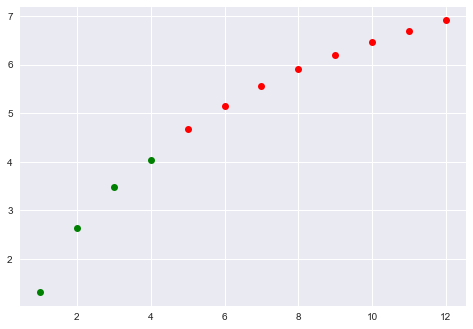

--------------------------------------------------------------------------
--------------------------------------------------------------------------
--==--
SREZ =  9
COLUMN =  4
coef: [0.14134578 1.55316747]
Y_true= [0, 0.53, 1.16, 1.49]
Y_PREDICT= 1.8881
r2= 0.9929124428035115
--==--
SREZ =  9
COLUMN =  5
coef: [0.14133774 1.55318442]
Y_true= [0, 0.53, 1.16, 1.49, 1.8881]
Y_PREDICT= 2.2125
r2= 0.9958912379042412
--==--
SREZ =  9
COLUMN =  6
coef: [0.14134208 1.55317289]
Y_true= [0, 0.53, 1.16, 1.49, 1.8881, 2.2125]
Y_PREDICT= 2.4987
r2= 0.9973086040484619
--==--
SREZ =  9
COLUMN =  7
coef: [0.14134728 1.55315658]
Y_true= [0, 0.53, 1.16, 1.49, 1.8881, 2.2125, 2.4987]
Y_PREDICT= 2.7531
r2= 0.9980882171197037
--==--
SREZ =  9
COLUMN =  8
coef: [0.1413474  1.55315617]
Y_true= [0, 0.53, 1.16, 1.49, 1.8881, 2.2125, 2.4987, 2.7531]
Y_PREDICT= 2.9807
r2= 0.9985616762767096
--==--
SREZ =  9
COLUMN =  9
coef: [0.14134713 1.55315728]
Y_true= [0, 0.53, 1.16, 1.49, 1.8881, 2.2125, 2.4987, 2.7531,

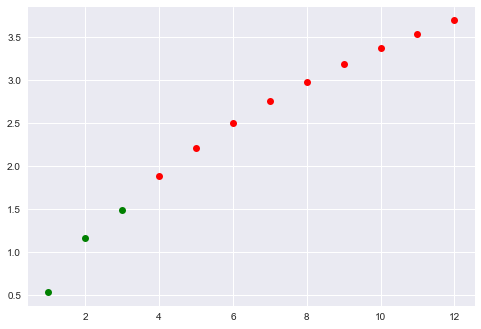

--------------------------------------------------------------------------
--------------------------------------------------------------------------
--==--
SREZ =  10
COLUMN =  3
coef: [1.58101770e-08 4.34782606e+00]
Y_true= [0, 0.23, 0.46]
Y_PREDICT= 0.69
r2= 1.0
--==--
SREZ =  10
COLUMN =  4
coef: [-2.05759851e-08  4.34782614e+00]
Y_true= [0, 0.23, 0.46, 0.69]
Y_PREDICT= 0.92
r2= 1.0
--==--
SREZ =  10
COLUMN =  5
coef: [-2.09470567e-09  4.34782609e+00]
Y_true= [0, 0.23, 0.46, 0.69, 0.92]
Y_PREDICT= 1.15
r2= 1.0
--==--
SREZ =  10
COLUMN =  6
coef: [-6.82855404e-09  4.34782612e+00]
Y_true= [0, 0.23, 0.46, 0.69, 0.92, 1.15]
Y_PREDICT= 1.38
r2= 1.0
--==--
SREZ =  10
COLUMN =  7
coef: [9.59511996e-09 4.34782604e+00]
Y_true= [0, 0.23, 0.46, 0.69, 0.92, 1.15, 1.38]
Y_PREDICT= 1.61
r2= 1.0
--==--
SREZ =  10
COLUMN =  8
coef: [1.23425383e-08 4.34782602e+00]
Y_true= [0, 0.23, 0.46, 0.69, 0.92, 1.15, 1.38, 1.61]
Y_PREDICT= 1.84
r2= 1.0
--==--
SREZ =  10
COLUMN =  9
coef: [-3.52424241e-09  4.34

C:\Users\DEXTER\Anaconda2\lib\site-packages\scipy\optimize\minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)



Y_PREDICT= 2.76
r2= 1.0


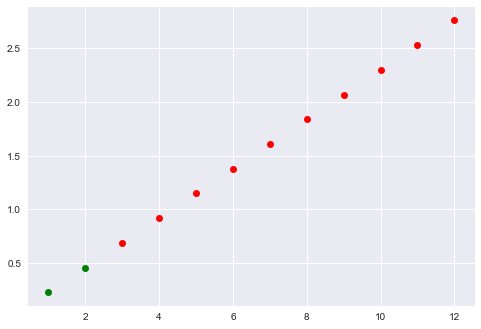

In [43]:
# Для остальных срезов повторим данные алгоритм и предскажем недостающие значения

for i in range(2,11): # срезы
    print '--------------------------------------------------------------------------'
    print '--------------------------------------------------------------------------'
    for col in range(13-i,13):  # пропущенные месяца
        print '--==--'
        print 'SREZ = ',i
        print 'COLUMN = ',col
        
        x=range(0,col)
        y=[0]+list(tab[[str(j) for j in range(1,13)]].loc[i])[:-(12-col+1)]   # известные значения
        coef, _ = curve_fit(f, x, y)                                          # подбор коэффициентов для функции
        
        print 'coef:',coef
        print 'Y_true=',y
        print 'Y_PREDICT=', round(f(col, coef[0], coef[1]),4)
        tab[str(col)].loc[i] = round(f(col, coef[0], coef[1]),4)              # записали предсказанное значение в таблицу
        
        print 'r2=',r2_score(y,[f(j, coef[0], coef[1]) for j in x] )          # Метрика R2
    
    
    plt.plot(range(1,13-i), list(tab[[str(j) for j in range(1,13-i)]].loc[i]) , 'go') # известные значения (зелёные точки)
    plt.plot(range(13-i,13), list(tab[[str(j) for j in range(13-i,13)]].loc[i])  , 'ro') # предсказанные значения
    plt.show()                                                                           # (красные точки)
        

In [44]:
tab

,Period,One_costs,Profit_acc,Cnt_install,Price_1,Profit_acc_1,1,2,3,4,5,6,7,8,9,10,11,12
0,2015-01-01,20993,45974,28168,0.7,1.6,0.38,0.76,0.99,1.1200,1.2000,1.2600,1.3000,1.3600,1.4400,1.5000,1.5900,1.6300
1,2015-02-01,47079,116475,26663,1.8,4.4,0.83,1.70,2.10,2.3800,2.6400,3.0300,3.3600,3.6100,3.9000,4.1500,4.3700,4.4200
2,2015-03-01,144109,127178,42267,3.4,3.0,0.82,1.60,1.94,2.1600,2.3600,2.5000,2.6400,2.8000,2.9200,3.0100,3.0407,3.0999
3,2015-04-01,125072,73330,31103,4.0,2.4,0.71,1.34,1.58,1.8000,1.9600,2.0700,2.1700,2.2700,2.3600,2.4021,2.4524,2.4960
4,2015-05-01,81831,53457,41406,2.0,1.3,0.49,0.70,0.83,0.9800,1.0700,1.1500,1.2500,1.2900,1.3099,1.3438,1.3729,1.3981
5,2015-06-01,17168,19870,6700,2.6,3.0,0.66,1.51,2.13,2.4400,2.7200,2.8800,2.9700,3.2545,3.3971,3.5205,3.6283,3.7234
6,2015-07-01,28940,26922,6741,4.3,4.0,1.23,2.45,2.96,3.4100,3.7300,3.9900,4.2507,4.4373,4.5941,4.7278,4.8431,4.9436
7,2015-08-01,48653,54343,12291,4.0,4.4,1.19,2.53,3.28,3.7900,4.4200,4.8686,5.2551,5.5877,5.8771,6.1311,6.3558,6.5561
8,2015-09-01,55696,50020,12371,4.5,4.0,1.32,2.64,3.48,4.0400,4.6732,5.1489,5.5526,5.8995,6.2009,6.4651,6.6986,6.9064
9,2015-10-01,38681,19153,12823,3.0,1.5,0.53,1.16,1.49,1.8881,2.2125,2.4987,2.7531,2.9807,3.1855,3.3708,3.5393,3.6931


#### 3.2. Рассчитатайте ROI на 12-й месяц после инсталла по каждому из периодов кампании.

In [45]:
# ROI=(доход - себестоимость)/сумма инвестиций * 100%

tab['ROI'] = (tab['12']-tab['Price_1'])*tab['Cnt_install'] / tab['One_costs'] * 100.0

tab[['Period','ROI']]

,Period,ROI
0,2015-01-01,124.785595
1,2015-02-01,148.382633
2,2015-03-01,-8.801898
3,2015-04-01,-37.401586
4,2015-05-01,-30.455783
5,2015-06-01,43.841915
6,2015-07-01,14.991388
7,2015-08-01,64.573665
8,2015-09-01,53.450112
9,2015-10-01,22.976710


#### 3.3. Сделайте краткие выводы об эффективности кампании.

In [ ]:
# Как видно с значений ROI рекламная кампания была неэффективной в период с 2015-03 по 2015-05, тк имеем убыток. 
# Наиболее эффективными были кампании за январь, февраль и ноябрь месяц. 

#### 3.4. Смоделируйте, какая может быть максимальная стоимость привлечения на одного игрока, чтобы обеспечить окупаемость кампании за 12 месяцев.

In [46]:
# Для того, чтобы рекламная кампания была не убыточной, необходимо потратить на привлечение 1 игрока сумму
# расчитанную следующим образом

tab['Zero_profit'] =  (tab['12']*tab['Cnt_install'])/tab['Cnt_install']
tab['Zero_ROI'] = (tab['12']-tab['Zero_profit'])*tab['Cnt_install'] / tab['One_costs'] * 100.0
tab[['Period','Price_1','ROI','Zero_profit','Zero_ROI']]

,Period,Price_1,ROI,Zero_profit,Zero_ROI
0,2015-01-01,0.7,124.785595,1.6300,0.0
1,2015-02-01,1.8,148.382633,4.4200,0.0
2,2015-03-01,3.4,-8.801898,3.0999,0.0
3,2015-04-01,4.0,-37.401586,2.4960,0.0
4,2015-05-01,2.0,-30.455783,1.3981,0.0
5,2015-06-01,2.6,43.841915,3.7234,0.0
6,2015-07-01,4.3,14.991388,4.9436,0.0
7,2015-08-01,4.0,64.573665,6.5561,0.0
8,2015-09-01,4.5,53.450112,6.9064,0.0
9,2015-10-01,3.0,22.976710,3.6931,0.0


In [47]:
# Для того, чтобы иметь прибыль в 20% необходимо потратить следующую сумму
# Формула выведена из формулы для расчета ROI
tab['20%_profit'] = tab['12'] - (0.2 * tab['One_costs'] ) / tab['Cnt_install'] 
tab['20%_ROI'] = (tab['12']-tab['20%_profit'])*tab['Cnt_install'] / tab['One_costs'] * 100.0
tab[['Period','Price_1','Zero_profit','Zero_ROI','20%_profit','20%_ROI']]

,Period,Price_1,Zero_profit,Zero_ROI,20%_profit,20%_ROI
0,2015-01-01,0.7,1.6300,0.0,1.480944,20.0
1,2015-02-01,1.8,4.4200,0.0,4.066859,20.0
2,2015-03-01,3.4,3.0999,0.0,2.418002,20.0
3,2015-04-01,4.0,2.4960,0.0,1.691756,20.0
4,2015-05-01,2.0,1.3981,0.0,1.002838,20.0
5,2015-06-01,2.6,3.7234,0.0,3.210922,20.0
6,2015-07-01,4.3,4.9436,0.0,4.084974,20.0
7,2015-08-01,4.0,6.5561,0.0,5.764415,20.0
8,2015-09-01,4.5,6.9064,0.0,6.005972,20.0
9,2015-10-01,3.0,3.6931,0.0,3.089793,20.0
